In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from numpy import asarray

In [3]:
# 데이터 전처리 (첫번째 데이터 프레임까지) 파일

def read_sns(file_name) :
    data = pd.read_excel("D:/DataScience/data/SNS_데이터/%s.xlsx" %file_name)
    year_list = []
    month_list = []
    day_list = []
    date_list = []
    for i in data.DATE :
        year_list.append(str(i)[:4])
    for i in data.DATE :
        month_list.append(str(i)[4:6])
    for i in data.DATE :
        day_list.append(str(i)[6:8])
    for i in data.DATE :
        date_list.append(str(i)[:8])
    return  pd.DataFrame({"date":date_list,
                        "section":data.SECTION, 
                       "year":year_list, 
                       "month":month_list,
                          "day":day_list,
                       "title":data.TITLE, 
                       "content":data.CONTENT})


from tqdm import tqdm_notebook
for i in tqdm_notebook(range(1,9)) :
    exec("SNS_%d = read_sns('SNS_%d')" %(i,i))

# for i in range(1,9) :
#     exec("print(SNS_%d.head(2))"%i)

In [5]:
sns = pd.concat([SNS_1,SNS_2,SNS_3,SNS_4,SNS_5,SNS_6,SNS_7,SNS_8],ignore_index=True)
sns.content = sns.content.astype(str)

In [6]:
apr = sns[sns['month']=='04']
may= sns[sns['month']=='05']
jun= sns[sns['month']=='06']
july= sns[sns['month']=='07']
aug= sns[sns['month']=='08']
sep= sns[sns['month']=='09']
octo= sns[sns['month']=='10']
nov = sns[sns['month']=='11']
dec = sns[sns['month']=='12']
jan = sns[sns['month']=='01']
feb = sns[sns['month']=='02']
mar = sns[sns['month']=='03']

In [47]:
# 미세먼지 데이터 업로드
n_dust_month = pd.read_csv("D:/DataScience/data/미세먼지/n_dust_month.csv")
n_dust_month = n_dust_month.rename(columns={"pm10":"pm10_n"})
j_dust_month = pd.read_csv("D:/DataScience/data/미세먼지/j_dust_month.csv")
j_dust_month = j_dust_month.rename(columns={"pm10":"pm10_j"})

# 월별 평균 데이터 구하기
n_dust_month.set_index("Date",inplace=True)
j_dust_month.set_index("Date",inplace=True)
dust_month = pd.concat([n_dust_month,j_dust_month],axis=1)
dust_month["pm10"] = (dust_month["pm10_n"]+dust_month["pm10_j"])/2
del dust_month["pm10_n"]
del dust_month["pm10_j"]
dust_month.reset_index(inplace=True)
dust_month

,Date,pm10
0,201804,46.685984
1,201805,45.424308
2,201806,41.373570
3,201807,34.654231
4,201808,37.530600
5,201809,34.126963
6,201810,38.826354
7,201811,55.999444
8,201812,59.483938
9,201901,72.169308


In [54]:
list(dust_month["pm10"])
dust_month[str(i) for i in list(dust_month["Date"])]

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [84]:
#이거 그래프 그릴때마다 lis=[] 다시 해줘야돼... 이걸 함수에 집어넣는 법을 모르겠어
import re
lis=[]
def count_func(word,month):
    count = 0
    for i in range(len(month)):
        count+=len(re.findall(word,month['content'].iloc[i]))
    lis.append(count)
    
def all_month(word):
    li = [apr,may,jun,july,aug,sep,octo,nov,dec,jan,feb,mar]
    for a in li:
        count_func(word,a)

In [85]:
def graph_func(word):
    dust_list = list(dust_month["pm10"])
    date_list = [str(i) for i in list(dust_month["Date"])]
    
    all_month(word)
    plt.plot(date_list,asarray(dust_list)*400,'wheat', label = '미세먼지')
    plt.plot(date_list,lis,'chocolate', label = word)
    plt.rcParams["figure.figsize"] = (10,6)
    plt.rcParams['lines.linewidth'] = 4
    plt.rcParams['axes.grid']=True
    plt.xlabel('날짜')
    plt.title('미세먼지와 %s빈도수' %word)
    plt.legend(loc='upper left', frameon=False)
    plt.savefig("../data/마스크.png", dpi=100)
    plt.show()

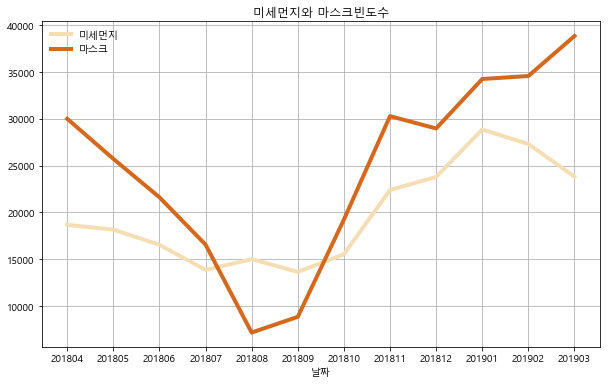

In [86]:
graph_func('마스크')